In [5]:
#Introduction
#This project builds an end-to-end machine learning pipeline to detect fraudulent credit card transactions.  
#We explore the dataset, build multiple models, tune hyperparameters, and deploy the best model as a web app using Streamlit.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc, classification_report, roc_auc_score, confusion_matrix
import pickle

In [7]:
#Data-Loading  

In [9]:
data = pd.read_csv('creditcard.csv')

In [11]:
# Print dataset shape & preview first 5 rows
print("Shape:", data.shape)
print(data.head())

Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

In [12]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
# Fill missing values using forward fill
data.ffill(inplace=True)

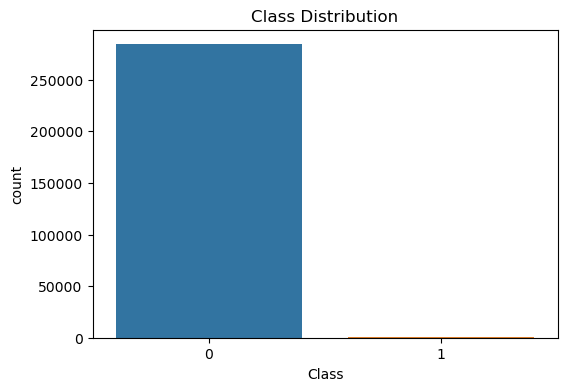

In [34]:
# Plot class distribution (fraud vs. non-fraud)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [13]:
# Scale features using StandardScaler
scaler = StandardScaler()
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

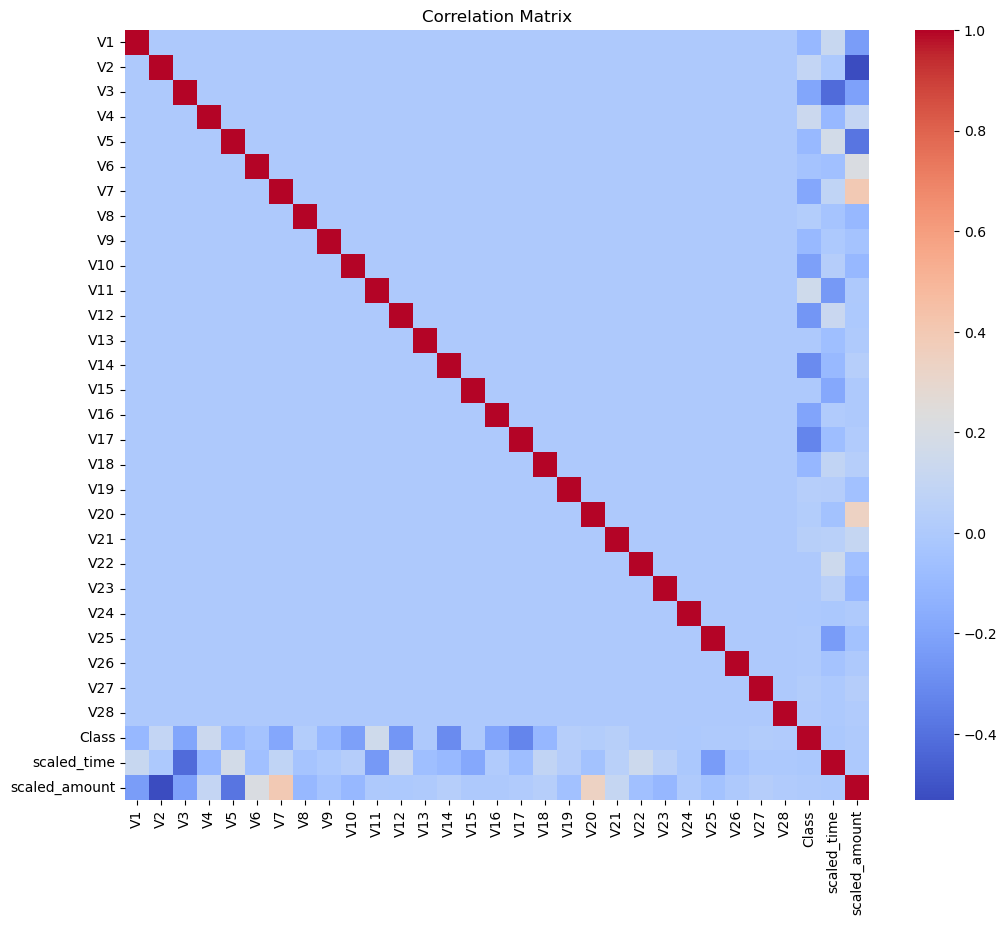

In [38]:
# Plot feature correlations
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [15]:
# Split dataset into features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [32]:
%matplotlib inline

In [35]:
fraud_ratio = data['Class'].mean()
print(f"Fraudulent transactions ratio: {fraud_ratio:.4f} ({fraud_ratio*100:.2f}%)")

Fraudulent transactions ratio: 0.0017 (0.17%)


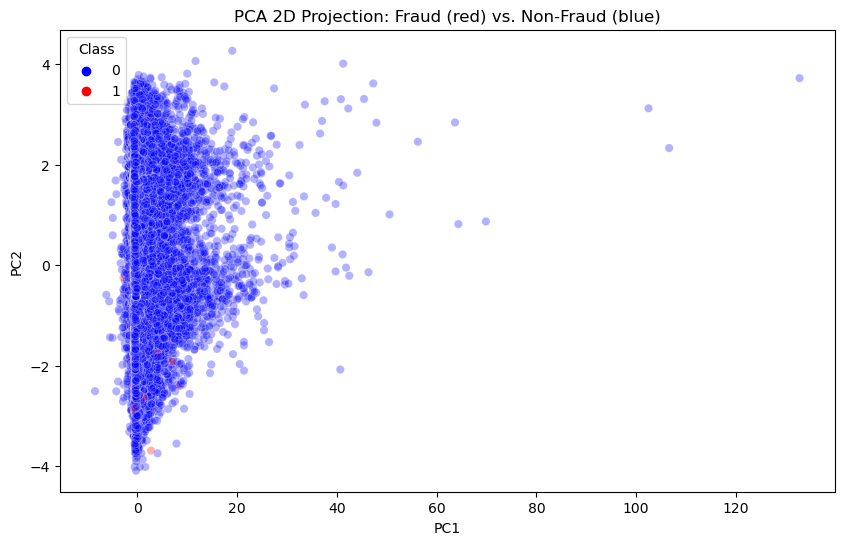

In [36]:
from sklearn.decomposition import PCA

# Separate features & target
X_pca = data.drop('Class', axis=1)
y_pca = data['Class']

# Standardize features (PCA is sensitive to scale)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_scaled_pca)

# Create a dataframe for plotting
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Class'] = y_pca.values

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=pca_df, 
    x='PC1', y='PC2', 
    hue='Class', 
    palette={0: 'blue', 1: 'red'},
    alpha=0.3
)
plt.title("PCA 2D Projection: Fraud (red) vs. Non-Fraud (blue)")
plt.show()

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [39]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf, param_grid,
    scoring='roc_auc',
    cv=3, n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Logistic Regression - AUPRC: 0.7639
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:


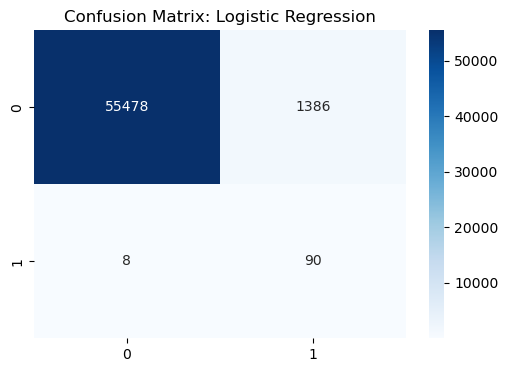

ROC-AUC Score: 0.9720881652464024
------------------------------------------------------------
Random Forest - AUPRC: 0.8705
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.73      0.83        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:


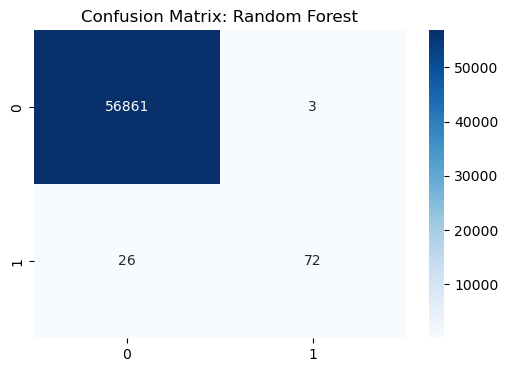

ROC-AUC Score: 0.9529122654267108
------------------------------------------------------------
Gradient Boosting - AUPRC: 0.2123
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:


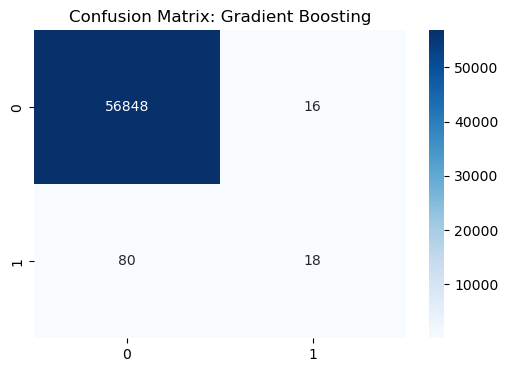

ROC-AUC Score: 0.3468859283302516
------------------------------------------------------------


In [40]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auc_score = auc(recall, precision)
    results[model_name] = auc_score
    print(f'{model_name} - AUPRC: {auc_score:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()
    print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_proba))
    print('-' * 60)

In [ ]:
y_pred_best = best_rf.predict(X_test)

print("Best Random Forest — Classification Report")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_best))

roc_auc_best = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc_best:.4f}")

In [41]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [27]:
# Save final model to disk
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [28]:
# Save scaler to disk
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

In [29]:
def deploy_model(data):
    scaled_time = data['scaled_time']
    scaled_amount = data['scaled_amount']
    features = data['features']
    
    input_data = np.array([scaled_time, scaled_amount] + features).reshape(1, -1)
    
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]
    
    return {
        'prediction': int(prediction[0]),
        'probability': float(prediction_proba[0])
    }


    result = deploy_model(model)
    print(result)

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/84/3b/35400175788cdd6a43c90dce1e7f567eb6843a3ba0612508c0f19ee31f5f/streamlit-1.46.1-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<7,>=4.0 from https://files.pythonhosted.org/packages/00/f0/2ef431fe4141f5e334759d73e81120492b23b2824336883a91ac04ba710b/cachetools-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<7,>=3.20 from https://files.pythonhosted.org/packages/44/3a/b15c4347dd4bf3a1b0ee882f384623e2063bb5cf9fa9d57990a4f7df2fb6/